### Merging ICES and MI underway data
**Making sure that dates are in same format and saving to new files**

In [1]:
import pandas as pd

# Read the CSV files
file1 = 'ICES\\ices_merged_eda.csv'
file2 = 'MI\\ctd_mi_daly\\daily_averages.csv'

# Replace 'date_column' with the name of the column containing the dates
df1 = pd.read_csv(file1, parse_dates=['Date'], infer_datetime_format=True)
df2 = pd.read_csv(file2, parse_dates=['Date'], infer_datetime_format=True)

# Convert the dates to the desired format
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d')

# Save the dataframes back to CSV files
df1.to_csv('output_file_ices.csv', index=False)
df2.to_csv('output_file_mi.csv', index=False)

In [3]:
df1=pd.read_csv('output_file_ices.csv')
df2=pd.read_csv('output_file_mi.csv')

#icesmi_merged_data = pd.concat([df1, df2], ignore_index=True)
#icesmi_merged_data.to_csv('icesmi_merged_data.csv', index=None)
df=pd.read_csv('merged_data\\icesmi_merged_data.csv')

In [4]:
df.shape

(31707, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31707 entries, 0 to 31706
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      31707 non-null  object 
 1   Longitude [degrees_east]  31707 non-null  float64
 2   Latitude [degrees_north]  31707 non-null  float64
 3   Temperature [degC]        31707 non-null  float64
dtypes: float64(3), object(1)
memory usage: 991.0+ KB


### Data points after merging both the data

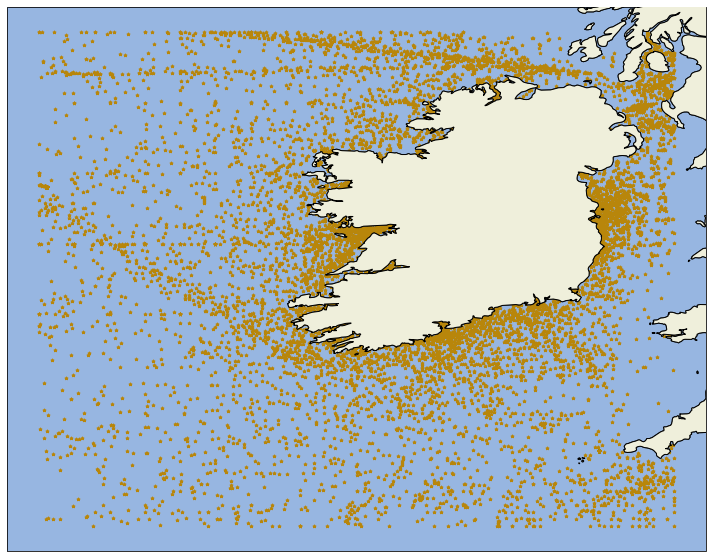

In [7]:
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.feature as cfeature
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Convert datetime column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
fig = plt.figure(figsize=[18,10])
ax = plt.axes(projection=ccrs.PlateCarree())

plt.scatter(df['Longitude [degrees_east]'], df['Latitude [degrees_north]'], s=10, color='darkgoldenrod', marker='*',
             transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND,zorder=100, edgecolor='k')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

plt.ylabel ('Latitude')
plt.xlabel ('Longitude')

plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31707 entries, 0 to 31706
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      31707 non-null  datetime64[ns]
 1   Longitude [degrees_east]  31707 non-null  float64       
 2   Latitude [degrees_north]  31707 non-null  float64       
 3   Temperature [degC]        31707 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 991.0 KB


In [9]:
df.describe()

,Longitude [degrees_east],Latitude [degrees_north],Temperature [degC]
count,31707.000000,31707.000000,31707.000000
mean,-8.262032,53.010454,12.963023
std,1.663028,1.419304,3.780655
min,-14.000000,49.000000,0.300000
25%,-9.374800,51.898442,9.940000
50%,-8.437300,53.162300,13.890000
75%,-6.983535,54.138200,15.900000
max,-5.000000,56.000000,25.500000


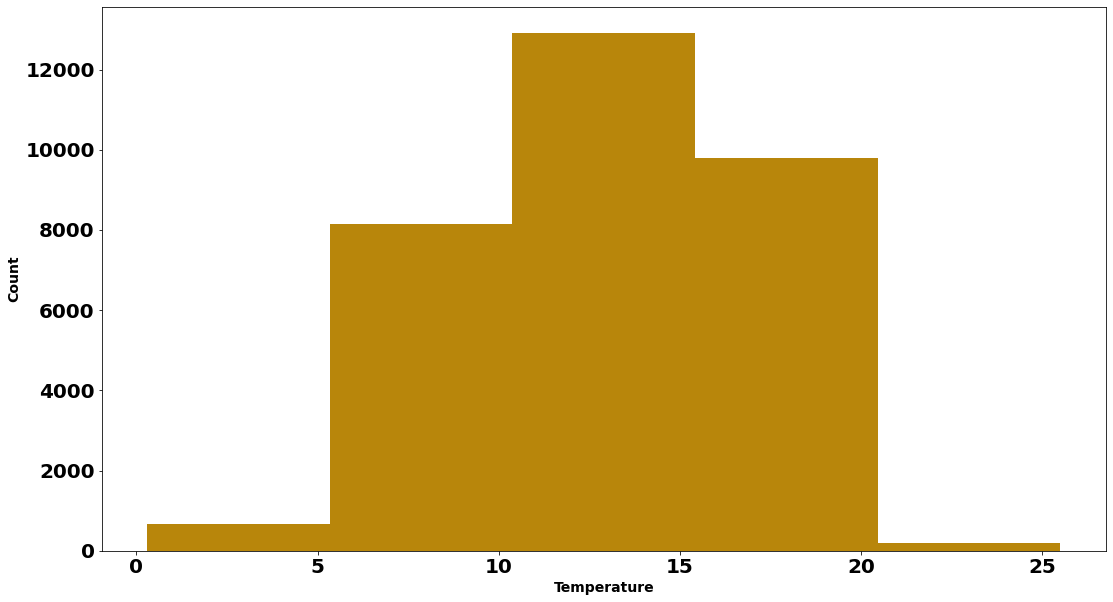

In [10]:
#Plot the distribution of the temperature column using a histogram
plt.figure(figsize=[18,10])
plt.rcParams.update({'font.size': 20, 'font.weight': 'bold'})
plt.hist(df['Temperature [degC]'],bins=5, color='darkgoldenrod')
plt.xlabel('Temperature', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.show()